插入成功：关于组织收看庆祝中国共产党成立100周年大会的通知
插入成功：关于举行庆祝建党100周年主题升旗仪式的通知
插入成功：关于组织收看“七一勋章”颁授仪式的通知
插入成功：关于开展2021届本科毕业设计（论文）外审工作的通知
插入成功：关于开展2021年度河南省优质网络思政微课（微视频）征集活动的通知
插入成功：关于参加华北水利水电大学“两优一先”表彰大会暨文艺汇演的通知
插入成功：关于我校2021年青年骨干教师培养计划候选人公示的通知
插入成功：关于做好学校形象宣传片拍摄工作的通知
插入成功：关于开展2020年度河南省社会科学优秀成果评奖的通知
插入成功：关于严肃考风考纪及期末考试安排的通知
插入成功：关于开展马克思、恩格斯、列宁关于哲学社会科学及各学科重要论述摘编申报工作的通知
插入成功：关于召开校友会秘书长工作会议的通知
插入成功：关于做好2021届毕业生合影工作的通知
插入成功：关于做好2021年优秀教育管理人才人选推荐工作的通知
插入成功：关于2021～2022学年第一学期本科生网上选课的通知
插入成功：关于开展“助力高考——我为高中母校寄简章”招生宣传活动的通知
插入成功：关于召开第九届学位评定委员会全体会议的通知 
插入成功：关于召开2021届毕业生校友工作联络员聘任仪式的通知
插入成功：关于召开网络安全与信息化工作暨首席信息官培训会议的通知
插入成功：关于召开测绘工程专业认证反馈会的通知
插入成功：关于做好2021年度河南省高等学校青年骨干教师培养计划申报工作的通知
插入成功：关于举办2021年暑期干部培训班暨党史学习教育读书班的预通知
插入成功：关于对我校享受河南省政府特殊津贴人员进行考核的通知
插入成功：致全体教职工的重要通告
插入成功：关于加快修订制定学校行政规章制度的通知   
插入成功：关于召开测绘工程专业认证汇报会的通知
插入成功：关于做好2021年第二季度教职工精神文明建设奖有关考核工作的通知
插入成功：关于组织举办2021届毕业生毕业典礼暨学位授予仪式的通知
插入成功：关于召开2020年招生工作总结表彰暨2021年招生宣传动员培训会的通知
插入成功：关于召开华北水利水电大学学位点评估和培养方案修订工作会议的通知
插入成功：关于开展研究生“学史增信 青春向党”红色经典诵读比赛的通知
插入成功：关于开展“百万党员消费助农”活动的通知

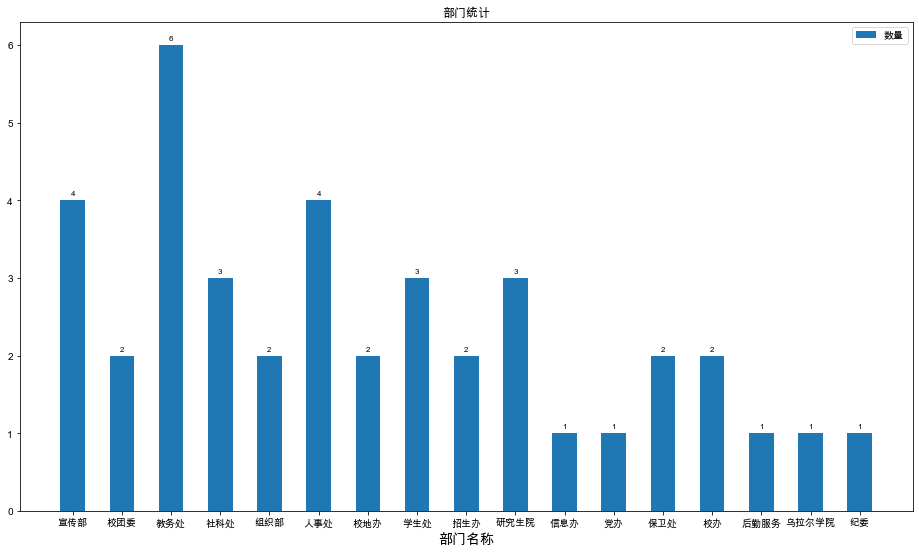

In [1]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pymysql

Number = 5  # 爬取通知页面的数量
url1 = 'http://www5.ncwu.edu.cn/channels/5.html'
url = 'http://www5.ncwu.edu.cn/channels/5_2.html'
urls = [url1, url]
url1s = []
texts = []
days = []
times = []
titles = []
departments = []
# 字符串拼接得到子网页的URL
for i in range(Number - 2):  
    i = i + 2
    str1 = "5_" + str(i)
    str2 = "5_" + str(i + 1)
    url = url.replace(str1, str2)
    urls.append(url)
for url in urls:  # 爬取需要的内容
    html = requests.get(url)  # 获取网页源代码
    html.encoding = 'utf-8'
    soup = BeautifulSoup(html.text, 'html.parser')  # 解析网页
    title = soup.select(  # 提取标题
        'body > div:nth-child(4) > div > div.news_content > div.news-list > div > div.description > h2 '
        '>a:nth-child(2)')
    time = soup.select(  # 提取年份和月份
        'body > div:nth-child(4) > div > div.news_content > div.news-list > div > div.date > div.month')
    day = soup.select(  # 提取日期
        'body > div:nth-child(4) > div > div.news_content > div.news-list > div > div.date > div.day')
    department = soup.select(  # 提取部门
        'body > div:nth-child(4) > div > div.news_content > div.news-list > div > '
        'div.description > h2 > a.dw')

    # 存放网页内容方便进一步的文件存储和数据库存储
    for title in title:
        titles.append(title.get_text())
        url1s.append(title['href']) 
    for time in time:
        times.append(time.get_text())
    for day in day:
        days.append(day.get_text())
    for department in department:
        departments.append(department.get_text())

for url in url1s:  # 提取通知内容并存储
    html = requests.get(url)
    html.encoding = 'utf-8'
    soup = BeautifulSoup(html.text, 'html.parser')
    text = soup.select('body > div.wrap > div > div.news_content > div.detail-content-body')
    for t in text:
        texts.append(t.get_text())

# 将时间、标题、部门存进数据库
#阿里云Mysql数据库
con = pymysql.connect(host='47.94.252.232',user= 'root',password='123456',database='webnews')
cursor=con.cursor()
i=0
for day in days:
    # SQL语句
    sql = "INSERT INTO web(time,section,title) VALUES (%s, %s, %s)" % \
          ('\'' + times[i] + "-" + days[i] + '\'', '\'' + departments[i] + '\'', '\'' + titles[i] + '\'')
    try:
        cursor.execute(sql)
        print("插入成功："+str(titles[i]))
        con.commit()  
    except:
        con.rollback() 
        print("插入失败:" + str(titles[i]))
    i = i + 1
con.close()

#  将时间、标题、部门、内容按时间存进txt文本中
i = 0
path = "/Users/mac/Desktop/新闻.txt"
with open(path, 'w+', encoding='utf-8') as file:
    for day in days:
        file.write(str(times[i]) + "-" + days[i])
        file.write(departments[i] + titles[i])
        file.write(texts[i])
        i = i + 1
file.close()

# 使用柱状图统计部门发布的新闻数量
#解决Mac下绘图中文显示问题
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
departments_dict = Counter(departments)  # 统计列表中各部门出现次数
keys, values = zip(*departments_dict.items())  # 将key和value分开存储
x = np.arange(len(keys))
y = values
#柱状图大小设置
plt.figure(1, figsize=(16, 9))
#柱状图标题和标签
plt.title('部门统计')
plt.xlabel('部门名称', fontsize=14)
plt.xticks(fontsize=10)
#绘制柱状图
p = plt.bar(x, height=y, width=0.5, label="数量", tick_label=list(keys)) 
for a, b in zip(x, y):  
    plt.text(a, b + 0.05, '%0.f' % b, ha='center', va='bottom', fontsize=8,)
plt.legend()
plt.show()